In [51]:
from KKT_NN_GPT import KKT_NN
from pickle import load
import numpy as np
import torch
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns

In [52]:
model = KKT_NN()
model.kinn.load_state_dict(torch.load("kinn.pt"))

<All keys matched successfully>

In [53]:
sobol = torch.quasirandom.SobolEngine(7, scramble=True, seed=42)

In [54]:
batch = sobol.draw(10000).to(torch.device("mps"))

actions =2*batch[..., :2] -1
P_pots = 2*batch[...,2] -1
P_max = 2*batch[...,3] -1
Q_max = 2*batch[...,4] -1
P_plus = 2*batch[...,5] -1
Q_plus = 2*batch[...,6] -1

In [55]:
stationarity, feasibility, complementary = model.kkt_loss(actions, P_pots, P_max, Q_max, P_plus, Q_plus,)

In [56]:
df = pd.DataFrame(torch.stack([actions[..., 0], actions[...,1],P_pots, P_max, Q_max, P_plus, Q_plus, stationarity, feasibility, complementary, stationarity+feasibility+complementary], 1).cpu().detach(), columns=['action_p', 'action_q', 'P_pots', 'P_max', 'Q_max', 'P_plus', 'Q_plus', 'stat', 'feas', 'compl', 'sum'])
df.to_csv("param_analysis.csv")

In [30]:
df

,action_p,action_q,P_pots,P_max,Q_max,P_plus,Q_plus,stat,feas,compl,sum
0,0.995027,-0.791267,0.645958,-0.161136,0.056644,-0.887519,-0.089415,0.000068,4.929960e-05,0.000237,0.000355
1,-0.792331,0.963542,-0.360671,0.721019,-0.023555,0.318015,0.285633,0.000216,0.000000e+00,0.000005,0.000221
2,-0.036059,-0.482156,0.144591,-0.828831,-0.562205,0.609388,-0.861613,0.000113,0.000000e+00,0.000015,0.000128
3,0.239611,0.278630,-0.859534,0.273357,0.528979,-0.181120,0.513404,0.000041,0.000000e+00,0.000004,0.000044
4,0.415527,-0.122091,-0.042011,0.181854,0.879252,-0.739524,-0.738558,0.000008,0.000000e+00,0.000030,0.000038
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.266101,0.927778,0.068175,0.967921,0.656921,-0.904058,-0.685016,0.000113,3.484125e-07,0.000145,0.000258
9996,0.074582,-0.709347,0.780163,0.612288,0.806007,-0.455030,0.566916,0.000001,0.000000e+00,0.000025,0.000026
9997,-0.154235,0.537798,-0.244893,-0.052405,-0.776642,0.773954,-0.808070,0.000097,0.000000e+00,0.000016,0.000113
9998,-0.892927,-0.017229,0.280859,0.382094,-0.309493,0.044073,0.356692,0.000171,0.000000e+00,0.000001,0.000173


In [31]:
df.corr()

,action_p,action_q,P_pots,P_max,Q_max,P_plus,Q_plus,stat,feas,compl,sum
action_p,1.000000,-0.000157,-0.000266,-0.000576,-0.000113,-0.001194,0.000070,0.107101,0.101580,0.247698,0.213017
action_q,-0.000157,1.000000,-0.000028,0.000316,-0.000161,-0.000004,-0.001501,0.034329,-0.014136,0.000419,0.020528
P_pots,-0.000266,-0.000028,1.000000,-0.000001,0.000596,-0.000008,0.000167,0.087810,0.142918,0.270754,0.219102
P_max,-0.000576,0.000316,-0.000001,1.000000,0.000023,-0.000021,-0.000205,0.031277,-0.049588,-0.094266,-0.035052
Q_max,-0.000113,-0.000161,0.000596,0.000023,1.000000,-0.000062,0.000158,-0.105485,-0.049966,-0.056632,-0.107481
P_plus,-0.001194,-0.000004,-0.000008,-0.000021,-0.000062,1.000000,-0.000005,-0.062556,-0.094724,-0.112430,-0.114743
Q_plus,0.000070,-0.001501,0.000167,-0.000205,0.000158,-0.000005,1.000000,-0.040401,-0.054511,-0.115094,-0.094060
stat,0.107101,0.034329,0.087810,0.031277,-0.105485,-0.062556,-0.040401,1.000000,0.170676,0.219689,0.806322
feas,0.101580,-0.014136,0.142918,-0.049588,-0.049966,-0.094724,-0.054511,0.170676,1.000000,0.495371,0.540711
compl,0.247698,0.000419,0.270754,-0.094266,-0.056632,-0.112430,-0.115094,0.219689,0.495371,1.000000,0.733676


/var/folders/x0/fjnzwgpj3pndx212mlrpc1mh0000gn/T/ipykernel_89163/1257836181.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  g = sns.PairGrid(df.drop(["feas", "compl"], 1), hue="sum")


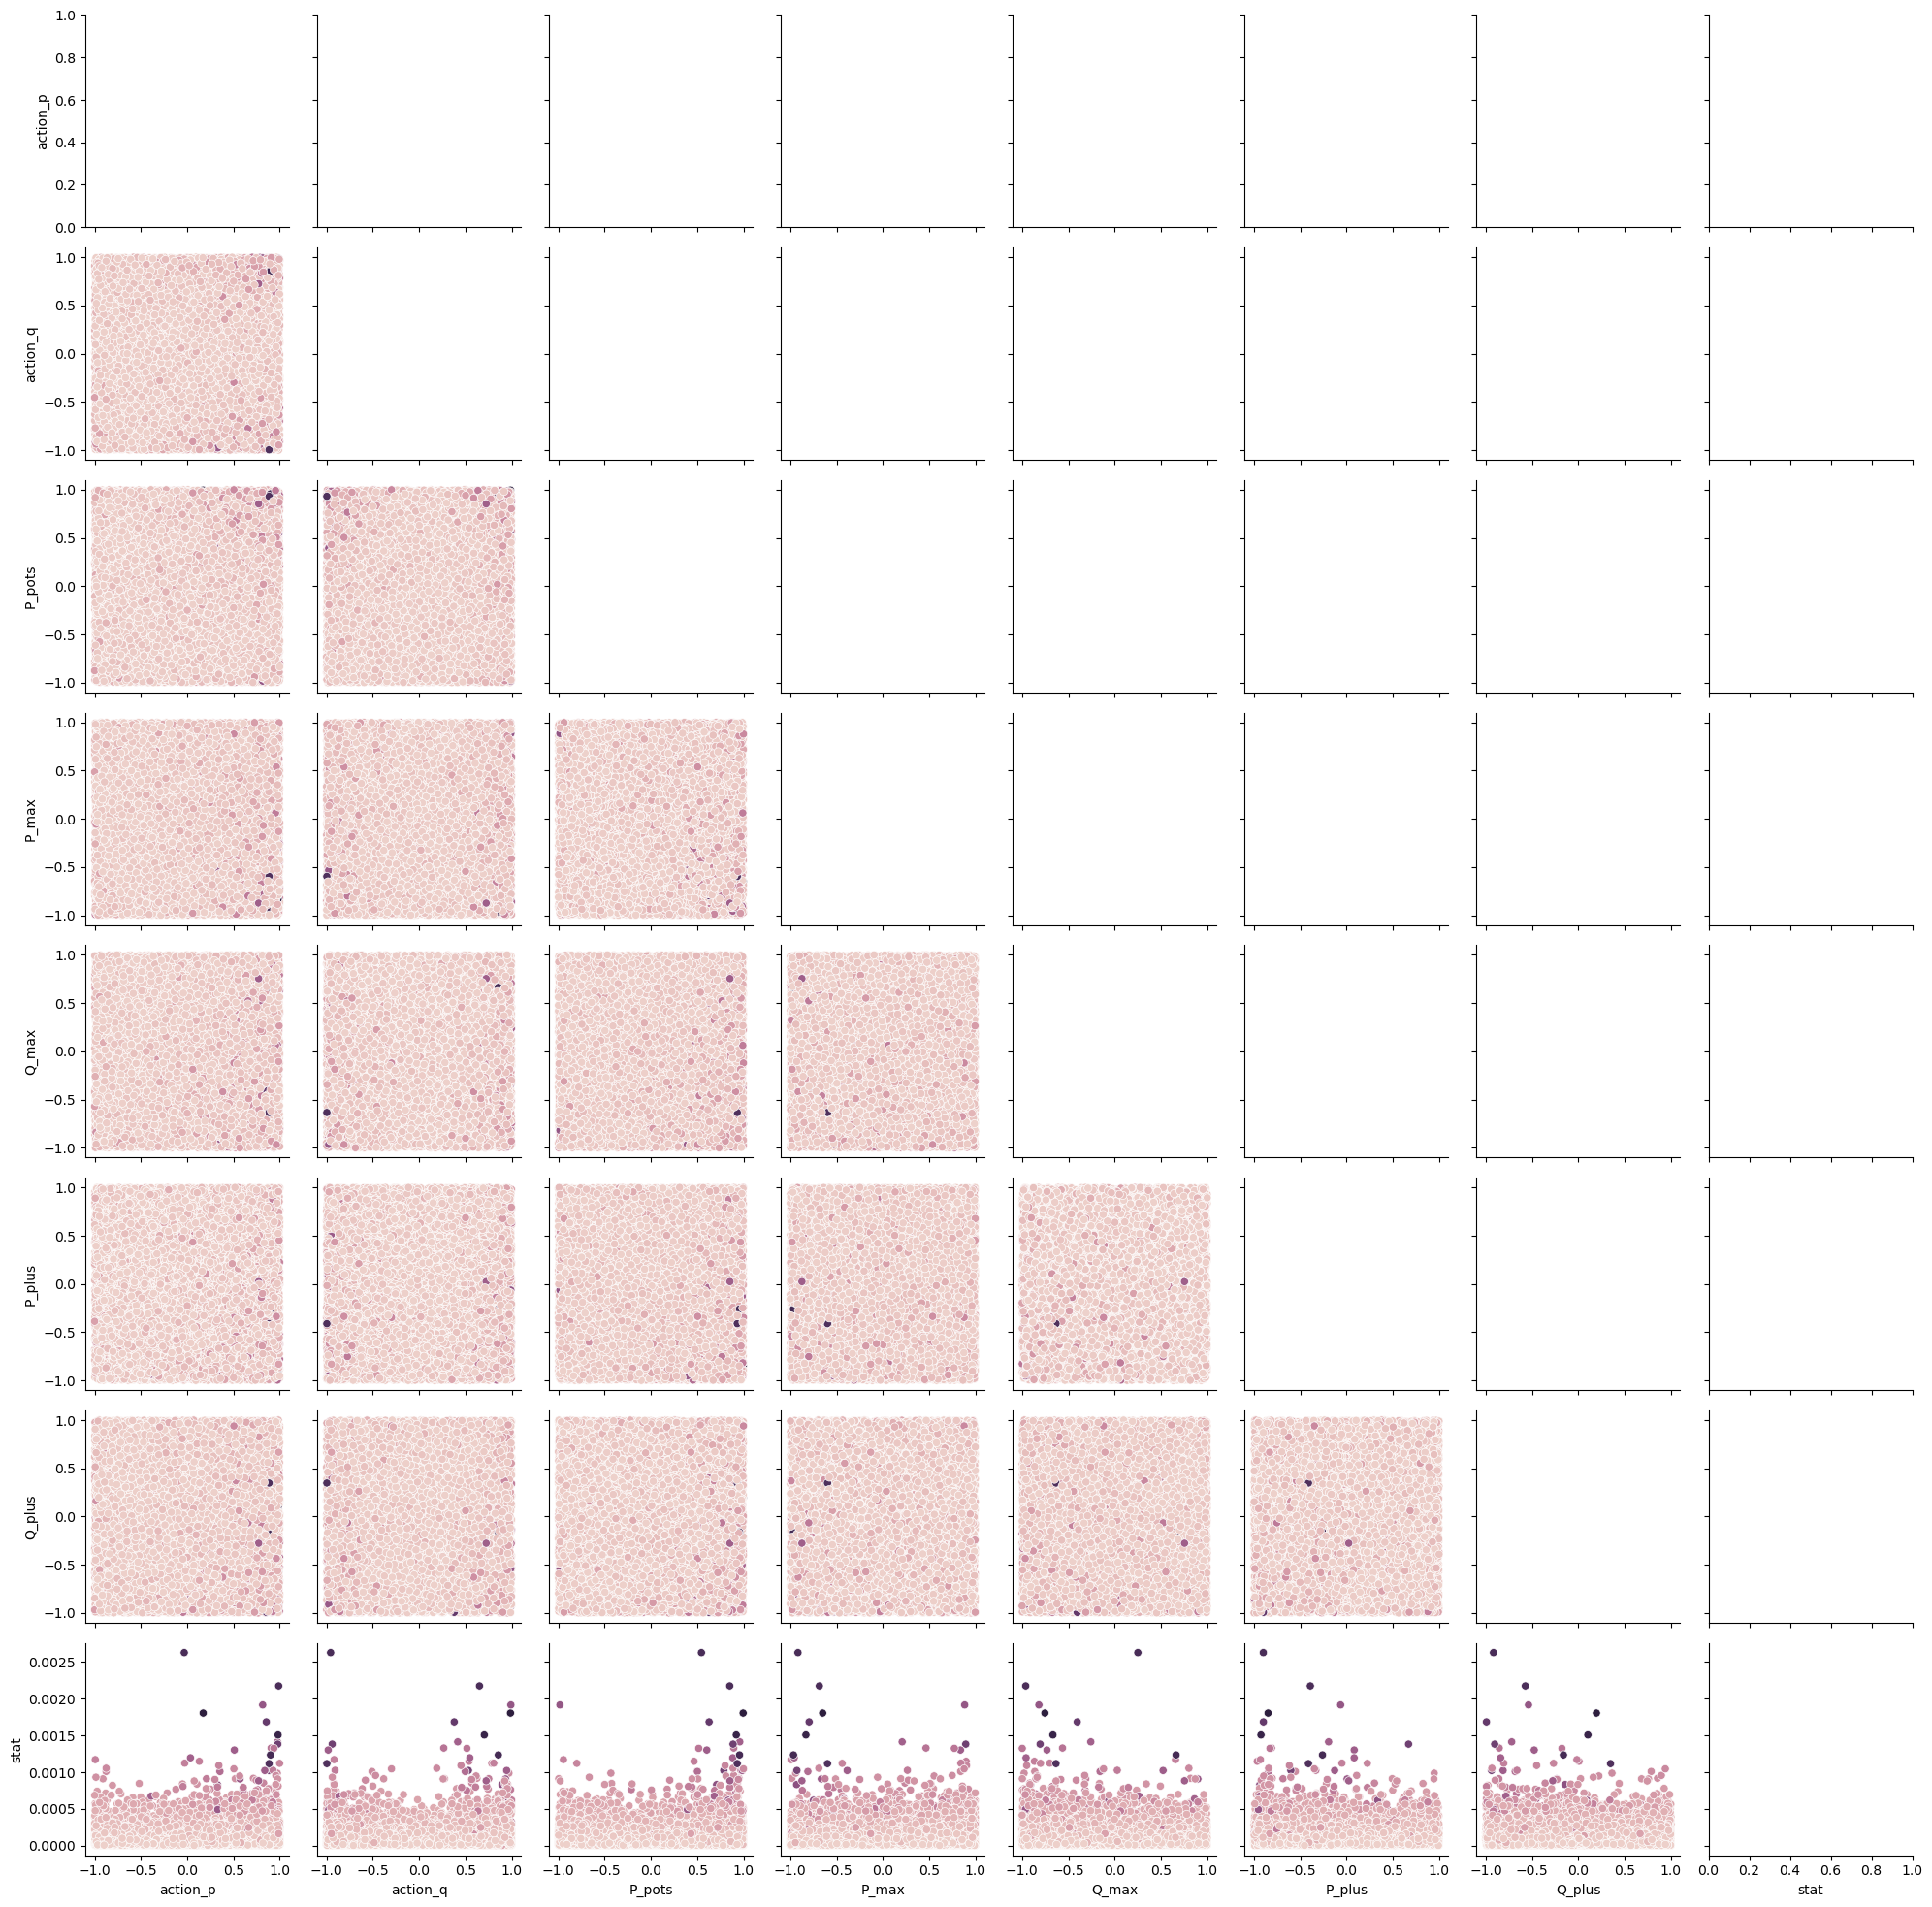

In [32]:
g = sns.PairGrid(df.drop(["feas", "compl"], 1), hue="sum")
g.map_lower(sns.scatterplot)